# Intro to Quantum Programming - Spring 2021
## Homework 1: Due 02/05/2021

For each exercise below, add as many cells as you want. To evaluate your submission, I will do **Restart and Run All**. . For help with Markdown, see [this link](https://www.markdownguide.org/).

In [263]:
# Here's a cell for import statements... add more if necessary (or just import below as needed)
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import kaleidoscope.qiskit
from kaleidoscope.interactive import bloch_disc, bloch_multi_disc, bloch_sphere
import math

---

#### Exercise 1.1
From the list of single-qubit operations below, group together the operations that are equivalent (up to a global phase).
- X
- Z
- H
- HZH
- HXH
- Ry($\pi$/2)
- Rx($\pi$)Ry($\pi$/2)
- Ry($-\pi$/2)Rz($\pi$)

Demonstrate that the gates in each equivalent group are indeed equivalent. Your demonstration must show that the equivalent transformations have the same effect on any input qubit state. Remember that "up to a global phase" means that both the $|0\rangle$ and $|1\rangle$ components are affected by phase in exactly the same way.

In [264]:
# The groups I chose are:
# 1. X and HZH
# 2. Z and HXH
# 3. H and Ry(-𝜋/2)Rz(𝜋)
# 4. Ry(𝜋/2)
# 5. Rx(𝜋)Ry(𝜋/2)

# The next few cells are some demonstrations that these groups are correct:
# (I couldn't figure out how to make this exercise prettier so sorry about that)

In [265]:
# Equivalent group 1: X and HZH
    
# Initializes the variables to be used
qsim = Aer.get_backend('qasm_simulator')
qc1 = QuantumCircuit(2,2)

# Show that they give the same result when starting at 0 (both bits should be the same)
qc1.x(0)

qc1.h(1)
qc1.z(1)
qc1.h(1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))





# Show that they give the same result when starting at 1 (both bits should be the same)
qc1b = QuantumCircuit(2,2)

qc1b.x(0)
qc1b.x(0)

qc1b.x(1)
qc1b.h(1)
qc1b.z(1)
qc1b.h(1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job2 = execute(qc1b, qsim, shots=1024)
result2 = job2.result()

# Prints result
print(result2.get_counts(qc1b))





# Show that they are reversable when starting at 0 (answer should be 0)
qc1c = QuantumCircuit(1,1)

qc1c.x(0)
qc1c.h(0)
qc1c.z(0)
qc1c.h(0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting at 1 (answer should be 1)
qc1c = QuantumCircuit(1,1)

qc1c.x(0)

qc1c.x(0)
qc1c.h(0)
qc1c.z(0)
qc1c.h(0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting after a H gate (answer should be 0)
qc1c = QuantumCircuit(1,1)
qc1c.h(0)

qc1c.x(0)
qc1c.h(0)
qc1c.z(0)
qc1c.h(0)

qc1c.h(0)
qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))

{'11': 1024}
{'00': 1024}
{'0': 1024}
{'1': 1024}
{'0': 1024}


In [266]:
# Equivalent group 2: Z and HXH

# Initializes the variables to be used
qsim = Aer.get_backend('qasm_simulator')
qc1 = QuantumCircuit(2,2)

# Show that they give the same result when starting at 0 (both bits should be the same)
qc1.z(0)

qc1.h(1)
qc1.x(1)
qc1.h(1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))





# Show that they give the same result when starting at 1 (both bits should be the same)
qc1b = QuantumCircuit(2,2)

qc1b.x(0)
qc1b.z(0)

qc1b.x(1)
qc1b.h(1)
qc1b.x(1)
qc1b.h(1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job2 = execute(qc1b, qsim, shots=1024)
result2 = job2.result()

# Prints result
print(result2.get_counts(qc1b))





# Show that they are reversable when starting at 0 (answer should be 0)
qc1c = QuantumCircuit(1,1)

qc1c.z(0)
qc1c.h(0)
qc1c.x(0)
qc1c.h(0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting at 1 (answer should be 1)
qc1c = QuantumCircuit(1,1)

qc1c.x(0)

qc1c.z(0)
qc1c.h(0)
qc1c.x(0)
qc1c.h(0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting after a H gate (answer should be 0)
qc1c = QuantumCircuit(1,1)
qc1c.h(0)

qc1c.z(0)
qc1c.h(0)
qc1c.x(0)
qc1c.h(0)

qc1c.h(0)
qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





print("\nDifferences\n")
# Show that it is different than group 1
# Show that the two groups give different result when starting at 0 
# Group 1 returns 1 and group 2 returns 0
qc1d = QuantumCircuit(2,2)

qc1d.z(0)

qc1d.x(1)

qc1d.measure(0,0)
qc1d.measure(1,1)

# Executes Circuit
job4 = execute(qc1d, qsim, shots=1024)
result4 = job4.result()

# Prints result
print(result4.get_counts(qc1d))

{'00': 1024}
{'11': 1024}
{'0': 1024}
{'1': 1024}
{'0': 1024}

Differences

{'10': 1024}


In [267]:
# Group 3 is H and Ry( −𝜋 /2)Rz( 𝜋 )
# Their phases are different but the global phase is unaffected

# Initializes the variables to be used
qsim = Aer.get_backend('qasm_simulator')
qc1 = QuantumCircuit(2,2)

# Show that they give the same result when starting at 0 (both bits should be equal chances of both)
qc1.h(0)

qc1.ry(-1*math.pi/2,1)
qc1.rz(math.pi,1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))





# Show that they give the same result when starting at 1 (both bits should be equal chances of both)
qc1b = QuantumCircuit(2,2)

qc1b.x(0)
qc1b.h(0)

qc1b.x(1)
qc1b.ry(-1*math.pi/2,1)
qc1b.rz(math.pi,1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job2 = execute(qc1b, qsim, shots=1024)
result2 = job2.result()

# Prints result
print(result2.get_counts(qc1b))





# Show that they are reversable when starting at 0 (answer should be 0)
qc1c = QuantumCircuit(1,1)

qc1c.h(0)
qc1c.ry(-1*math.pi/2,0)
qc1c.rz(math.pi,0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting at 1 (answer should be 1)
qc1c = QuantumCircuit(1,1)

qc1c.x(0)

qc1c.h(0)
qc1c.ry(-1*math.pi/2,0)
qc1c.rz(math.pi,0)

qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))





# Show that they are reversable when starting after a H gate (answer should be 0)
qc1c = QuantumCircuit(1,1)
qc1c.h(0)

qc1c.h(0)
qc1c.ry(-1*math.pi/2,0)
qc1c.rz(math.pi,0)

qc1c.h(0)
qc1c.measure(0,0)

# Executes Circuit
job3 = execute(qc1c, qsim, shots=1024)
result3 = job3.result()

# Prints result
print(result3.get_counts(qc1c))




print("\nDifferences\n")
# We can prove that it is different than group 1 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0 
# (Group 1 returns 1 and Group 3 returns either 0 or 1
qc1 = QuantumCircuit(2,2)

qc1.h(0)

qc1.x(1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))




# We can prove that it is different than group 2 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0 
# Group 2 returns 0 and Group 3 returns either 0 or 1
qc1b = QuantumCircuit(2,2)

qc1b.h(0)

qc1b.z(1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job = execute(qc1b, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1b))


{'00': 251, '01': 256, '10': 248, '11': 269}
{'00': 242, '01': 278, '10': 245, '11': 259}
{'0': 1024}
{'1': 1024}
{'0': 1024}

Differences

{'10': 514, '11': 510}
{'00': 519, '01': 505}


In [268]:
# Group 4 is just Ry( 𝜋 /2 ) alone
import math

# We can prove that it is different than group 1 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0
# Group 1 returns 1 and Group 4 returns either 0 or 1
qc1 = QuantumCircuit(2,2)

qc1.ry(math.pi/2,0)

qc1.x(1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))




# We can prove that it is different than group 2 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0
# Group 2 returns 0 and Group 4 returns either 0 or 1
qc1b = QuantumCircuit(2,2)

qc1b.ry(math.pi/2,0)

qc1b.z(1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job = execute(qc1b, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1b))




# We can prove that it is different than group 3 through the following circuit:
# Show that the two groups do not always give the same result after an H gate
# Group 3 returns 0 and Group 4 returns 1
qc1c = QuantumCircuit(2,2)

qc1c.h(0)
qc1c.ry(math.pi/2,0)

qc1c.h(1)
qc1c.h(1)

qc1c.measure(0,0)
qc1c.measure(1,1)

# Executes Circuit
job = execute(qc1c, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1c))

{'10': 511, '11': 513}
{'00': 498, '01': 526}
{'01': 1024}


In [269]:
# Group 5 is just Rx( 𝜋 )Ry( 𝜋 /2) alone
import math

# We can prove that it is different than group 1 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0
# Group 1 returns 1 and Group 5 returns either 0 or 1
qc1 = QuantumCircuit(2,2)

qc1.rx(math.pi,0)
qc1.ry(math.pi/2,0)

qc1.x(1)

qc1.measure(0,0)
qc1.measure(1,1)

# Executes Circuit
job = execute(qc1, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1))




# We can prove that it is different than group 2 through the following circuit:
# Show that the two groups do not always give the same result when starting at 0
# Group 2 returns 0 and Group 5 returns either 0 or 1
qc1b = QuantumCircuit(2,2)

qc1b.rx(math.pi,0)
qc1b.ry(math.pi/2,0)

qc1b.z(1)

qc1b.measure(0,0)
qc1b.measure(1,1)

# Executes Circuit
job = execute(qc1b, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1b))




# We can prove that it is different than group 3 through the following circuit:
# Show that the two groups do not always give the same result with an H gate after them
# Group 3 returns 0 and Group 5 returns 1
qc1c = QuantumCircuit(2,2)

qc1c.rx(math.pi,0)
qc1c.ry(math.pi/2,0)
qc1c.h(0)

qc1c.h(1)
qc1c.h(1)

qc1c.measure(0,0)
qc1c.measure(1,1)

# Executes Circuit
job = execute(qc1c, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1c))




# We can prove that it is different than group 4 through the following circuit:
# Show that the two groups do not always give the same result with an H gate after them
# Group 4 returns 0 and Group 5 returns 1
qc1d = QuantumCircuit(2,2)

qc1d.rx(math.pi,0)
qc1d.ry(math.pi/2,0)
qc1d.h(0)

qc1d.ry(math.pi/2,1)
qc1d.h(1)

qc1d.measure(0,0)
qc1d.measure(1,1)

# Executes Circuit
job = execute(qc1d, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc1d))

{'10': 517, '11': 507}
{'00': 500, '01': 524}
{'01': 1024}
{'01': 1024}


---

#### Exercise 1.2
Write a python function that uses *one or more qubits* to simulate a random roll of a six-sided die. Demonstrate that the dice is "fair" -- each side has an equal chance of being rolled.
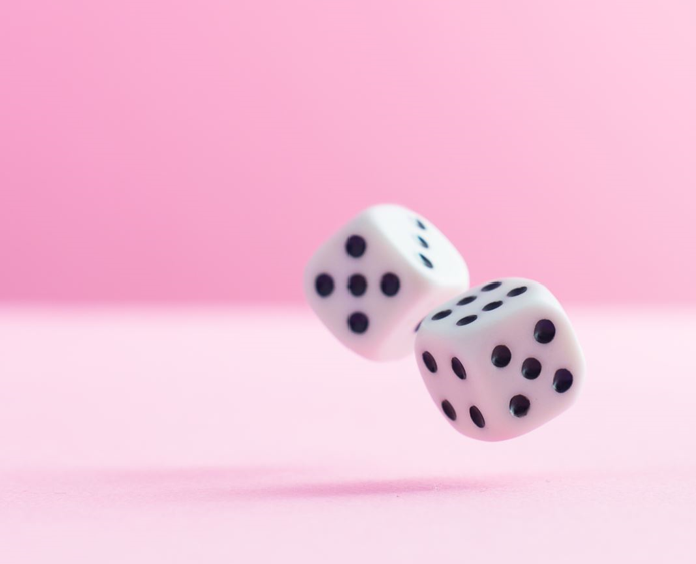

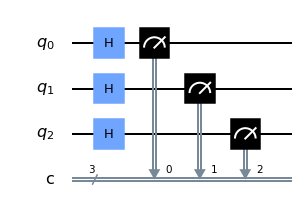

In [270]:
# Initializes the variables to be used

qsim = Aer.get_backend('qasm_simulator')
qc2 = QuantumCircuit(3,3)

# Creates the quantum circuit used for the experiment
# The circuit has an equal chance of getting anything between |000> and |111> (8 combinations)
# If the circuit lands on |110> or |111>, the circuit will re-roll to limit to the 6 options of the dice
qc2.h(0)
qc2.h(1)
qc2.h(2)
qc2.measure(0,0)
qc2.measure(1,1)
qc2.measure(2,2)

qc2.draw('mpl')

In [271]:
# Function that excecutes the circuit to simulate the dice rolling, and returns the value 'rolled'

def RollQuantum():
    job = execute(qc2, qsim, shots=1)
    result = job.result()
    x = result.get_counts(qc2)
    return x

In [272]:
# Function that processes the quantum circuit and returns the result as an int

def Roll():
    result = RollQuantum()
    while (result.get('111') != None or result.get('110') != None):
           result = RollQuantum()
    if result.get('000') != None:
        roll = 1
    if result.get('001') != None:
        roll = 2
    if result.get('010') != None:
        roll = 3
    if result.get('011') != None:
        roll = 4
    if result.get('100') != None:
        roll = 5
    if result.get('101') != None:
        roll = 6
    return roll

In [273]:
# Runs the program 9 times and prints results to demonstrate the program

for x in range(9):
    result = Roll()
    print("Roll number " + str(x + 1) + " is: " + str(result))

Roll number 1 is: 1
Roll number 2 is: 5
Roll number 3 is: 6
Roll number 4 is: 4
Roll number 5 is: 2
Roll number 6 is: 2
Roll number 7 is: 5
Roll number 8 is: 2
Roll number 9 is: 2


In [274]:
# Runs the program 1000 times and prints stats to demonstrate that the program is random
# The percentage should be around 16.7% for each number, though some variance is expected

# Dictionary used to store the stats of the 1000 rolls.
rollStats = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 0
}
numOfRolls = 1000
for x in range(numOfRolls):
    result = Roll()
    rollStats[str(result)] += 1
    
print("You rolled the number:\n")
print("One " + str(rollStats['1']) + 
      " times\t(" + str(round(rollStats['1'] / numOfRolls * 100, 1)) + "% of the time)")
print("Two " + str(rollStats['2']) + 
      " times\t(" + str(round(rollStats['2'] / numOfRolls * 100, 1)) + "% of the time)")
print("Three " + str(rollStats['3']) + 
      " times\t(" + str(round(rollStats['3'] / numOfRolls * 100, 1)) + "% of the time)")
print("Four " + str(rollStats['4']) + 
      " times\t(" + str(round(rollStats['4'] / numOfRolls * 100, 1)) + "% of the time)")
print("Five " + str(rollStats['5']) + 
      " times\t(" + str(round(rollStats['5'] / numOfRolls * 100, 1)) + "% of the time)")
print("Six " + str(rollStats['6']) + 
      " times\t(" + str(round(rollStats['6'] / numOfRolls * 100, 1)) + "% of the time)")

You rolled the number:

One 177 times	(17.7% of the time)
Two 156 times	(15.6% of the time)
Three 178 times	(17.8% of the time)
Four 175 times	(17.5% of the time)
Five 164 times	(16.4% of the time)
Six 150 times	(15.0% of the time)


---

#### Exercise 1.3
Design a circuit that permutes three qubits. It sends $|\psi\rangle|\phi\rangle|\nu\rangle$ to $|\phi\rangle|\nu\rangle|\psi\rangle$ for all single-qubit states $|\psi\rangle$, $|\phi\rangle$, and $|\nu\rangle$. Show a drawing of the circuit (using `mpl`) and demonstrate that it works.

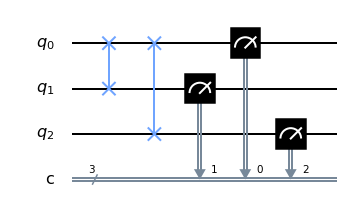

In [275]:
# Initializes the variables to be used

qsim = Aer.get_backend('qasm_simulator')
qc3 = QuantumCircuit(3,3)

# Creates the quantum circuit and draws it

qc3.swap(0,1)
qc3.swap(0,2)
qc3.measure(0,0)
qc3.measure(1,1)
qc3.measure(2,2)
qc3.draw('mpl')

In [276]:
# Defines the circuit while allowing later functions to change initial states
# Returns the created quantum circuit

def Per(x,y,z):
    qc3.initialize(x, 0)
    qc3.initialize(y, 1)
    qc3.initialize(z, 2)
    qc3.swap(0,1)
    qc3.swap(0,2)
    qc3.measure(0,0)
    qc3.measure(1,1)
    qc3.measure(2,2)
    return qc3

{'001': 1024}


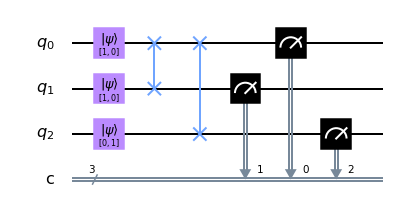

In [277]:
# Demonstration of the circuit with initial states of |100> 
# (answer should be |001>)

# Creates circuit
qc3 = QuantumCircuit(3,3)
qc3 = Per([1,0],[1,0],[0,1])

# Executes Circuit
job = execute(qc3, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc3))
qc3.draw('mpl')

{'100': 1024}


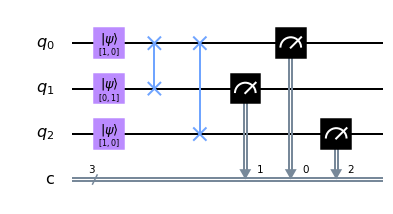

In [278]:
# Demonstration of the circuit with initial states of |010> 
# (answer should be |100>)

# Creates circuit
qc3 = QuantumCircuit(3,3)
qc3 = Per([1,0],[0,1],[1,0])

# Executes Circuit
job = execute(qc3, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc3))
qc3.draw('mpl')

{'010': 1024}


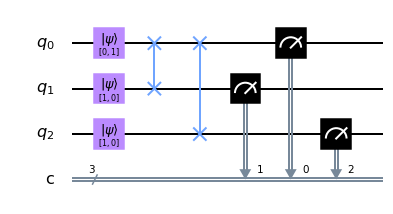

In [279]:
# Demonstration of the circuit with initial states of |001> 
# (answer should be |010>)

# Creates circuit
qc3 = QuantumCircuit(3,3)
qc3 = Per([0,1],[1,0],[1,0])

# Executes Circuit
job = execute(qc3, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc3))
qc3.draw('mpl')

---

#### Exercise 1.4
An $n$-qubit *cat state* is the state $\frac{1}{\sqrt{2}}\left(|000\ldots00\rangle + |111\ldots11\rangle \right)$. First, design a circuit with input $|000\rangle$ that creates a $3$-qubit cat state. Then, define a function that creates a circuit to generate an $n$-qubit cat state, and demonstrate the circuit for several different values of $n$.

{'000': 515, '111': 509}


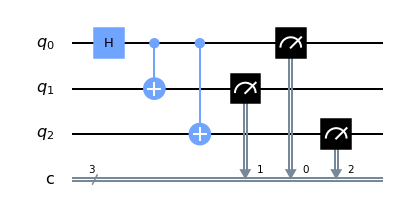

In [280]:
# Initializes the variables to be used

qsim = Aer.get_backend('qasm_simulator')
qc4 = QuantumCircuit(3,3)

# Creates the quantum circuit to create a 3-qubit cat state and draws it

qc4.h(0)
qc4.cx(0,1)
qc4.cx(0,2)
qc4.measure(0,0)
qc4.measure(1,1)
qc4.measure(2,2)

job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

In [281]:
# Function to create a n-qubit cat state
# Takes argument of number of qubits, returns the quantum circuit
# Extends the same circuit as above with more qubits

def Cat(n):
    # Initializes the variables to be used
    qsim = Aer.get_backend('qasm_simulator')
    qc4 = QuantumCircuit(n,n)

    qc4.h(0)
    for x in range(1, n):
        qc4.cx(0,x)

    for y in range(0, n):
        qc4.measure(y,y)
    return qc4

{'0': 512, '1': 512}


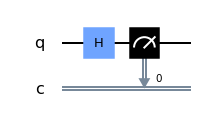

In [282]:
# Runs the circuit for a 1-qubit cat state using the function

qc4 = Cat(1)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

{'00': 492, '11': 532}


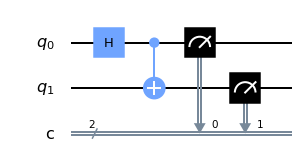

In [283]:
# Runs the circuit for a 2-qubit cat state using the function

qc4 = Cat(2)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

{'000': 519, '111': 505}


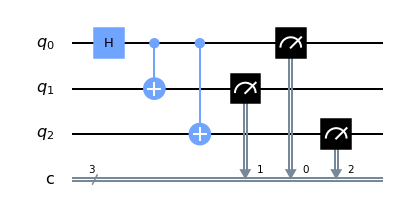

In [284]:
# Runs the circuit for a 3-qubit cat state using the function

qc4 = Cat(3)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

{'00000': 482, '11111': 542}


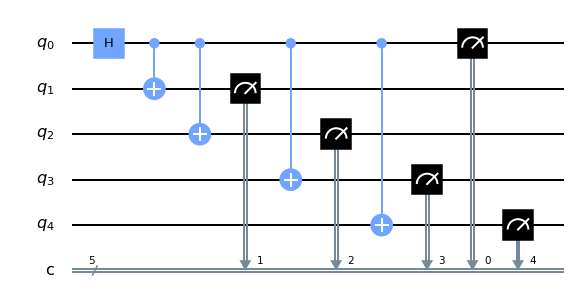

In [285]:
# Runs the circuit for a 5-qubit cat state using the function

qc4 = Cat(5)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

{'0000000000': 516, '1111111111': 508}


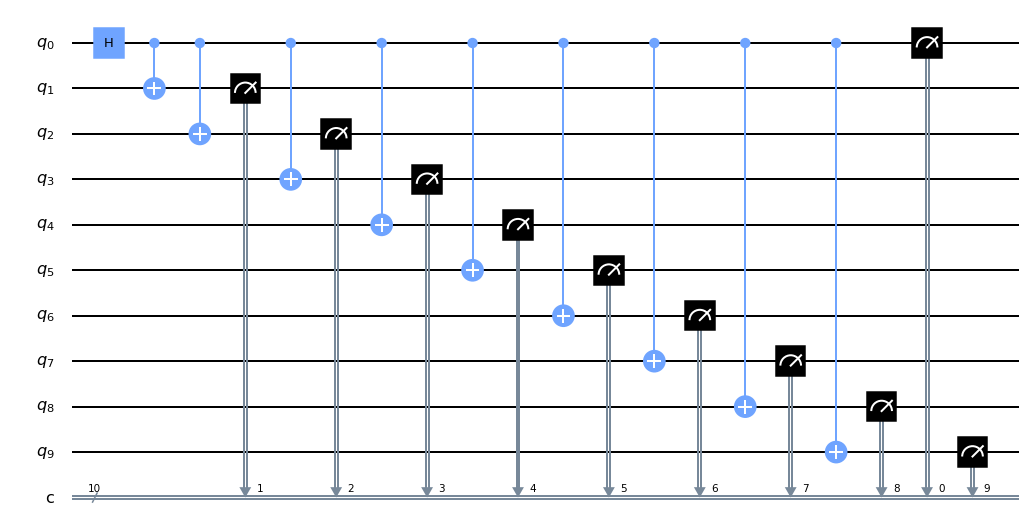

In [286]:
# Runs the circuit for a 10-qubit cat state using the function

qc4 = Cat(10)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

{'00000000000000000000000000000000': 536, '11111111111111111111111111111111': 488}


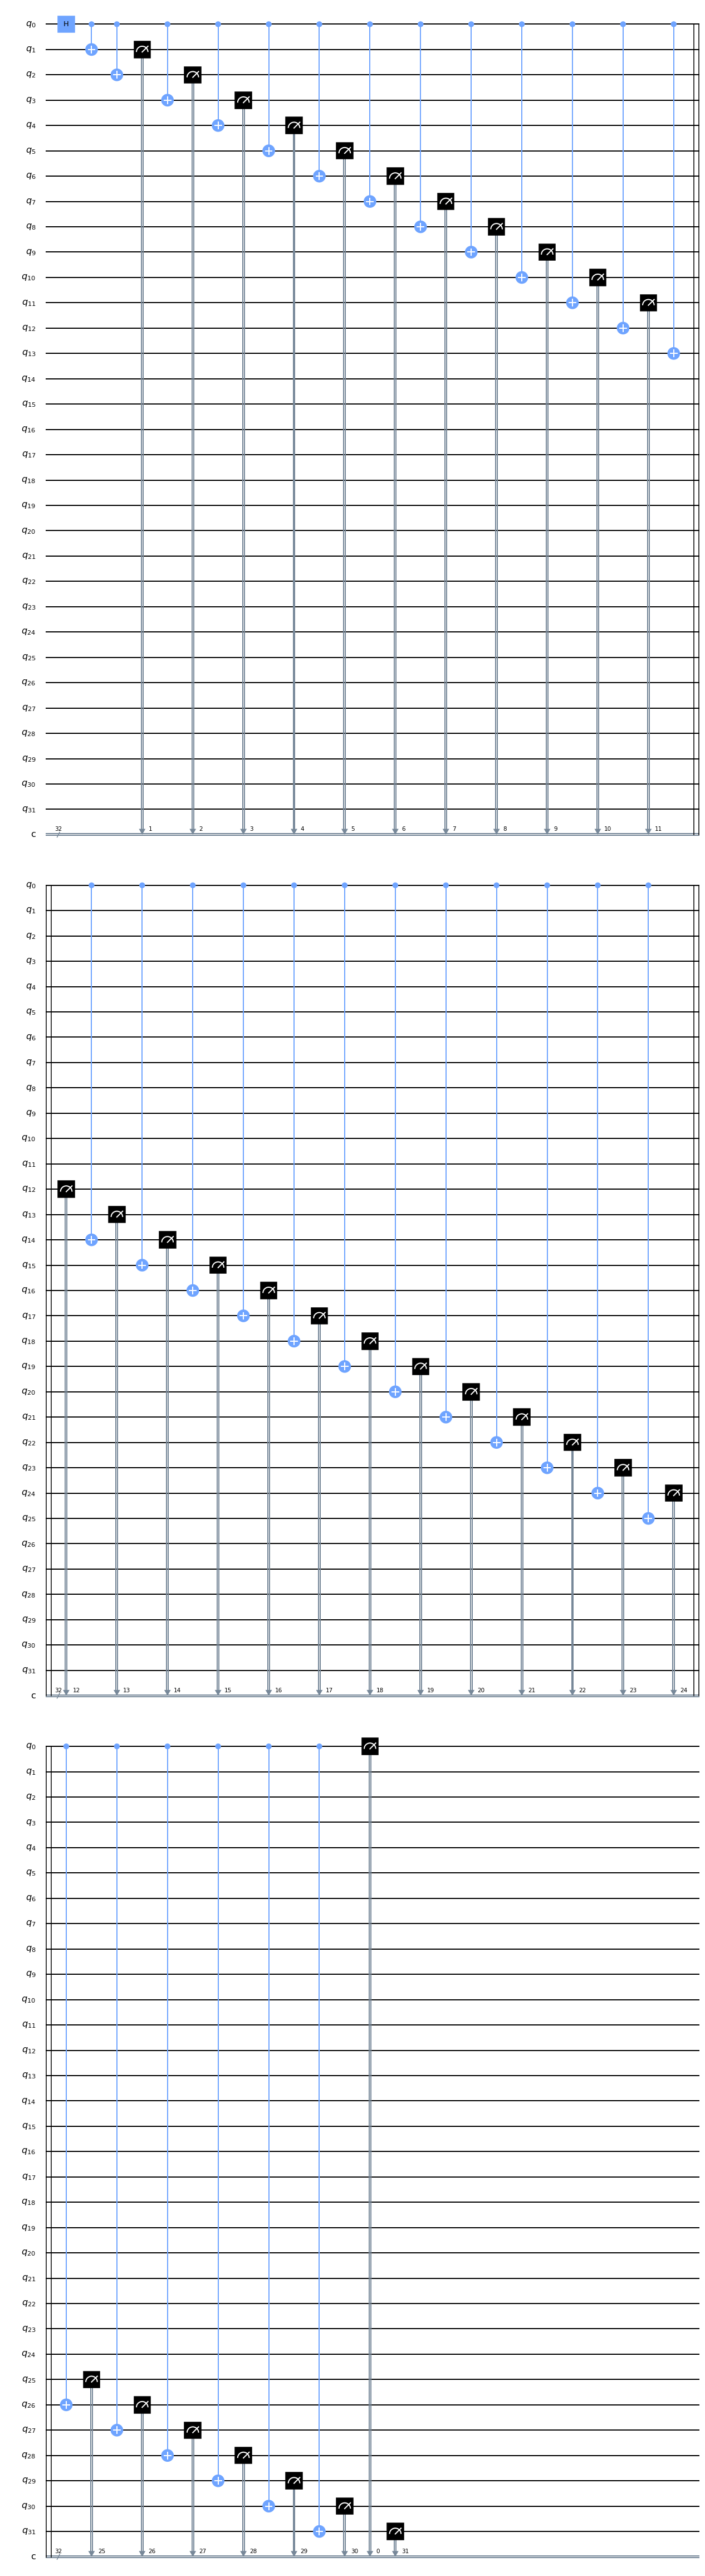

In [287]:
# Runs the circuit for a 32-qubit cat state using the function

qc4 = Cat(32)
job = execute(qc4, qsim, shots=1024)
result = job.result()

# Prints result
print(result.get_counts(qc4))
qc4.draw('mpl')

---

#### Exercise 1.5
Define and demonstrate a function that takes a single qubit in state $|0\rangle$ and a real value $0 \leq a \leq 1$, and returns a circuit that creates the state $a|0\rangle + b|1\rangle$, where $0 \leq b \leq 1$ is a real value and  $a^2 + b^2 = 1$. *Hint:* What sort of rotation will result in real coefficients? 

In [288]:
# Function that generates the quantum circuit with the input of 'a' where a is a real value 0 ≤ a ≤ 1.
# Returns a circuit that creates the state 𝑎|0⟩+𝑏|1⟩ ,
import math

def Rotate(a):
    qsim = Aer.get_backend('qasm_simulator')
    rotatedCircuit = QuantumCircuit(1,1)
    
    b = math.sqrt(1-(a*a))
    rotatedCircuit.rx(2*math.acos(a), 0)
    rotatedCircuit.measure(0,0)
    return(rotatedCircuit)

{'0': 1024}


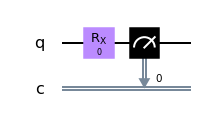

In [289]:
# Demonstrating with a = 1 (answer should be only 0s)

qc5 = Rotate(1)
job = execute(qc5, qsim, shots=1024)
result = job.result()
print(result.get_counts(qc5))
qc5.draw('mpl')

{'0': 511, '1': 513}


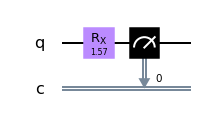

In [290]:
# Demonstrating with a = 0.707 (answer should be around equal amount of 0 and 1)

qc5 = Rotate(0.707)
job = execute(qc5, qsim, shots=1024)
result = job.result()
print(result.get_counts(qc5))
qc5.draw('mpl')

{'0': 155, '1': 869}


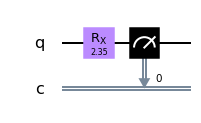

In [291]:
# Demonstrating with a = 0.387298 (answer should be around 15% 0s)

qc5 = Rotate(0.387298)
job = execute(qc5, qsim, shots=1024)
result = job.result()
print(result.get_counts(qc5))
qc5.draw('mpl')

{'1': 1024}


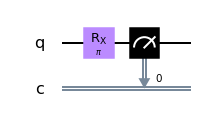

In [292]:
# Demonstrating with a = 0 (answer should be only 1s)

qc5 = Rotate(0)
job = execute(qc5, qsim, shots=1024)
result = job.result()
print(result.get_counts(qc5))
qc5.draw('mpl')

---

#### Exercise 1.6
Using Qiskit, reproduce the experiment from the textbook: *Example 3-6. Remote-controlled Randomness*. Use the QASM simulator to validate the results.

> If either bit is measured as 0, there's a 15% chance that the other bit will be measured as 1.

> If either bit is measured as 1, there's a 85% chance that the other bit will be measured as 1.

{'00': 392, '01': 88, '10': 88, '11': 456}


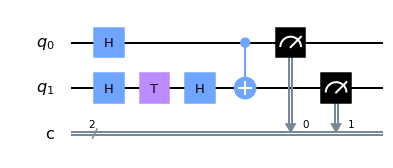

In [293]:
# Initializing everything

qsim = Aer.get_backend('qasm_simulator')
qc6 = QuantumCircuit(2,2)

# Creating the circuit
qc6.h(0)
qc6.h(1)
qc6.t(1)
qc6.h(1)
qc6.cnot(0,1)
qc6.measure(0,0)
qc6.measure(1,1)

# Running the circuit
job = execute(qc6, qsim, shots=1024)
result = job.result()
print(result.get_counts(qc6))
qc6.draw('mpl')